정확률= 60.680001974105835
정확률= 55.80000281333923
정확률= 53.31000089645386
정확률= 64.13000226020813
정확률= 67.61000156402588
정확률= 72.22999930381775
정확률= 76.34999752044678
정확률= 79.40000295639038
정확률= 84.579998254776
정확률= 87.97000050544739


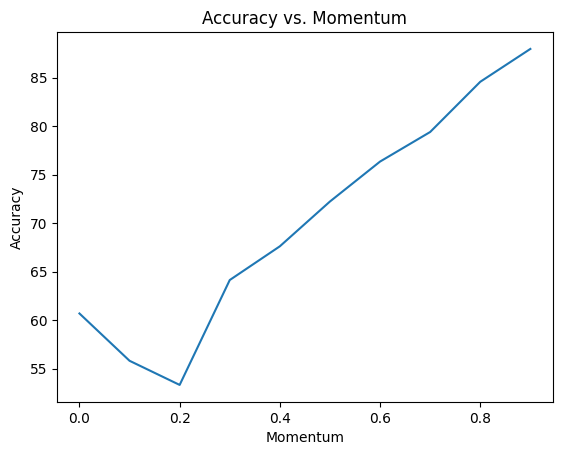

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()  
x_train = x_train.reshape(60000, 784) 
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32) / 255.0 
x_test = x_test.astype(np.float32) / 255.0 
y_train = tf.keras.utils.to_categorical(y_train, 10)  
y_test = tf.keras.utils.to_categorical(y_test, 10) 

momentum_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] 
accuracies = []
for momentum in momentum_values:
    mlp = Sequential()
    mlp.add(Dense(units=512, activation='tanh', input_shape=(784,))) 
    mlp.add(Dense(units=10, activation='softmax'))

    sgd = SGD(learning_rate=0.01, momentum=momentum) 
        
        
    mlp.compile(loss='MSE', optimizer=sgd, metrics=['accuracy'])
    mlp.fit(x_train, y_train, batch_size=128, epochs=3, validation_data=(x_test, y_test), verbose=0) 
    

    res = mlp.evaluate(x_test, y_test, verbose=0)
    accuracies.append(res[1] * 100)
    print('정확률=',res[1]*100)

plt.plot(momentum_values, accuracies)
plt.xlabel('Momentum')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Momentum')
plt.show()